In [57]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import cv2
import os
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [58]:
img = image.load_img('TensorflowTest/stroke_classifier/takeback_load/fed2.png')

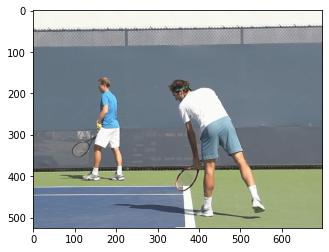

In [59]:
plt.imshow(img)

In [7]:
cv2.imread('TensorflowTest/stroke_classifier/takeback_load/fed2.png')


array([[[239, 248, 249],
        [241, 248, 249],
        [239, 248, 249],
        ...,
        [242, 247, 247],
        [242, 247, 247],
        [241, 248, 249]],

       [[241, 248, 249],
        [239, 248, 249],
        [241, 248, 249],
        ...,
        [242, 247, 247],
        [238, 246, 246],
        [242, 247, 247]],

       [[239, 248, 249],
        [241, 248, 249],
        [239, 248, 249],
        ...,
        [242, 247, 247],
        [242, 247, 247],
        [238, 246, 246]],

       ...,

       [[153, 122, 102],
        [153, 122, 102],
        [153, 122, 102],
        ...,
        [128, 170, 158],
        [130, 177, 164],
        [128, 170, 158]],

       [[153, 123, 105],
        [153, 123, 105],
        [153, 123, 105],
        ...,
        [130, 177, 164],
        [128, 170, 158],
        [127, 175, 162]],

       [[153, 123, 105],
        [156, 124, 105],
        [156, 124, 105],
        ...,
        [128, 170, 158],
        [130, 177, 164],
        [128, 170, 158]]

In [60]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)


In [61]:
train_dataset = train.flow_from_directory('TensorflowTest/stroke_classifier/',
                                            target_size=(500,500), batch_size = 2,
                                            class_mode = 'binary')

validation_dataset = train.flow_from_directory('TensorflowTest/validation/',
                                            target_size=(500,500), batch_size = 2,
                                            class_mode = 'binary')

Found 551 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [62]:
train_dataset.class_indices

{'extend': 0, 'takeback_load': 1}

In [64]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [65]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(500,500,3)), tf.keras.layers.MaxPool2D(2,2), 
#
tf.keras.layers.Conv2D(32, (3,3), activation='relu'), tf.keras.layers.MaxPool2D(2,2), 
#
tf.keras.layers.Conv2D(64, (3,3), activation='relu'), tf.keras.layers.MaxPool2D(2,2),
##
tf.keras.layers.Flatten(),
##
tf.keras.layers.Dense(512, activation='relu'),
##
tf.keras.layers.Dense(1, activation='sigmoid')])

In [69]:
model.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

In [71]:
model_fit = model.fit(train_dataset, steps_per_epoch=3, epochs=30, validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 11s 4s/step - loss: 0.4625 - accuracy: 0.8333 - val_loss: 0.9189 - val_accuracy: 0.4444
Epoch 2/30
3/3 [==============================] - 11s 4s/step - loss: 1.6865 - accuracy: 0.6667 - val_loss: 0.6430 - val_accuracy: 0.5556
Epoch 3/30
3/3 [==============================] - 11s 4s/step - loss: 0.6883 - accuracy: 0.5000 - val_loss: 0.6529 - val_accuracy: 0.6111
Epoch 4/30
3/3 [==============================] - 11s 4s/step - loss: 0.7147 - accuracy: 0.5000 - val_loss: 0.6656 - val_accuracy: 0.5556
Epoch 5/30
3/3 [==============================] - 11s 4s/step - loss: 0.6204 - accuracy: 0.5000 - val_loss: 0.6589 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 11s 4s/step - loss: 0.4744 - accuracy: 0.8333 - val_loss: 0.6691 - val_accuracy: 0.5556
Epoch 7/30
3/3 [==============================] - 12s 4s/step - loss: 0.5501 - accuracy: 0.5000 - val_loss: 1.0644 - val_accuracy: 0.5000
Epoch 8/30
3/3 [==================

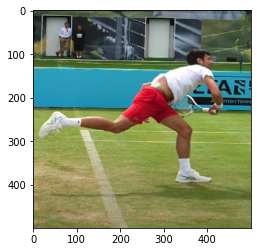

loading


In [79]:
# dir_path = 'TensorflowTest/test'
# print(os.listdir(dir_path))
# for i in os.listdir(dir_path):
img = image.load_img('TensorflowTest/test/sadfsdf.png', target_size=(500,500,3))
plt.imshow(img)
plt.show()
X = image.img_to_array(img)
X = np.expand_dims(X,axis=0)
images = np.vstack([X])
val = model.predict(images)
if val < 0.5:
    print("loading")
elif val >= 0.50 and val <= 1:
    print('extending')
else:
    print('neither')